In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset
# Class: (2 for benign, 4 for malignant)

names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 
         'marginal_adhesion', 'single_epithilial_size',
         'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data' , names = names)  

dataset.shape
dataset[158: 165]


,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithilial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
158,1193683,1,1,2,1,3,?,1,1,1,2
159,1196295,9,9,10,3,6,10,7,10,6,4
160,1196915,10,7,7,4,5,10,5,7,2,4
161,1197080,4,1,1,1,2,1,3,2,1,2
162,1197270,3,1,1,1,2,1,3,1,1,2
163,1197440,1,1,1,2,1,3,1,1,7,2
164,1197510,5,1,1,1,2,?,3,1,1,2


In [0]:
#id is not relevant feature
dataset.drop('id',axis = 1,inplace = True)

In [0]:
#You will find that bare_nuclei columns contain '?' 
#Hence we need to handle it

# Handling Missing value
dataset.replace('?',np.nan, inplace=True)

X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9].values
 
from sklearn.impute import SimpleImputer
missingvalues = SimpleImputer(missing_values = np.nan , strategy = 'mean', verbose= 0)
missingvalues = missingvalues.fit(X[:,0:9])
X[:,0:9]=missingvalues.transform(X[:,0:9])




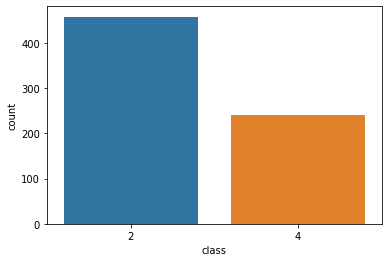

In [0]:
#EDA

import matplotlib.pyplot as plt
import seaborn as sns

#Univariate analysis target.
sns.countplot(dataset['class'])

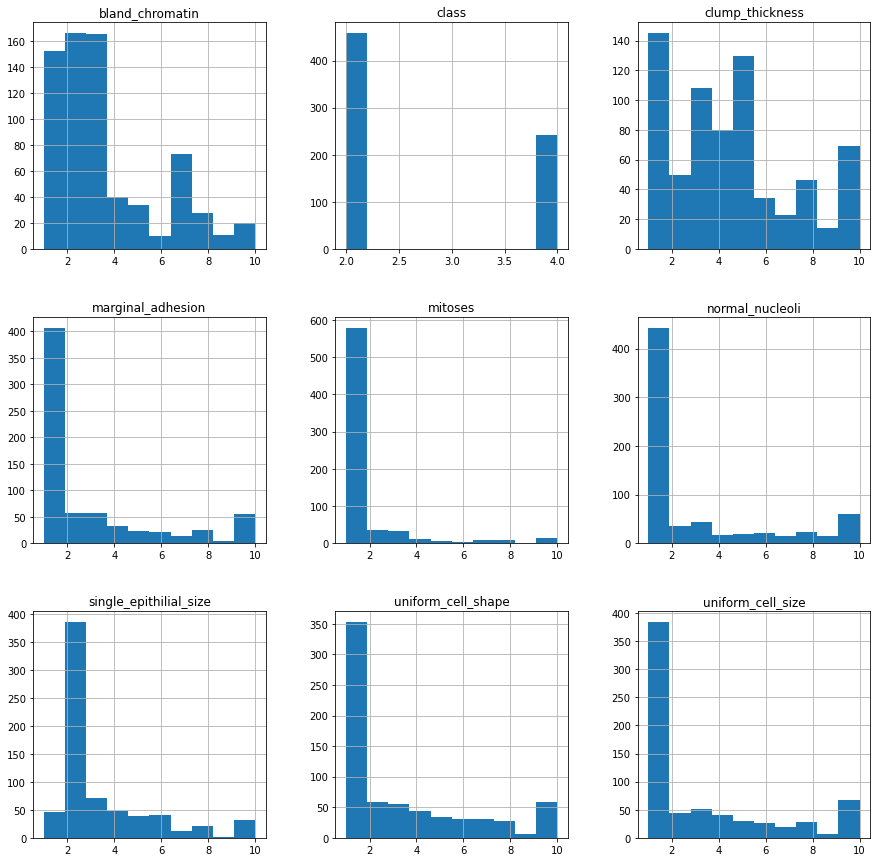

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithilial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [0]:
dataset.hist(figsize=(15,15))
plt.show()

dataset.describe()

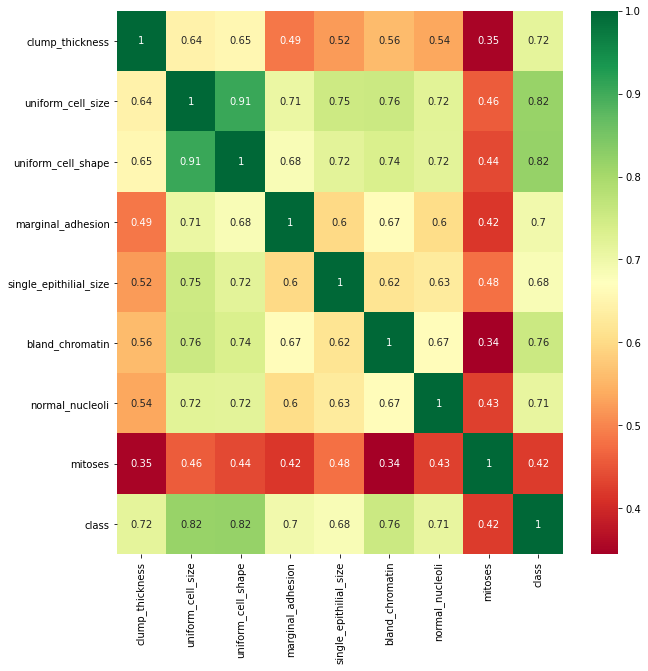

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
#get correlations of each features in dataset
dataset['bare_nuclei'] = X[:,6]
corrmat = dataset.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [0]:
#Correlation with output variable
cor = dataset.corr()
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

clump_thickness           0.716001
uniform_cell_size         0.817904
uniform_cell_shape        0.818934
marginal_adhesion         0.696800
single_epithilial_size    0.682785
bland_chromatin           0.756616
normal_nucleoli           0.712244
class                     1.000000
Name: class, dtype: float64

In [0]:
dataset.drop('bare_nuclei',axis = 1,inplace = True)
dataset.drop('mitoses',axis = 1,inplace = True)
X = dataset.iloc[:, 0:7].values


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [0]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#Stratified KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
kfold = StratifiedKFold(n_splits = 20, random_state = None)
cv_results = cross_val_score(classifier, X, y, cv = kfold, scoring = 'accuracy')
print("Accuracy Score of SVM:")
print(cv_results.mean())
print()
#Checking performance our model 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Checking performance our model .
print("Confusion Matrix ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score of SVM:
0.9557142857142857

Confusion Matrix 
[[82  3]
 [ 1 54]]
              precision    recall  f1-score   support

           2       0.99      0.96      0.98        85
           4       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


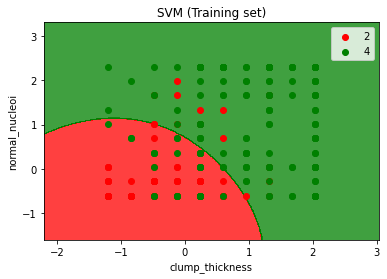

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


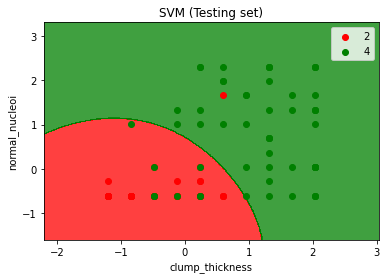

In [0]:
# Visualising the Training set results of SVM
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 6].min() - 1, stop = X_set[:, 6].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(5)]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 6],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('SVM (Training set)')
plt.xlabel('clump_thickness')
plt.ylabel('normal_nucleoi')
plt.legend()
plt.show()




# Visualising the Testing set results of SVM
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 6].min() - 1, stop = X_set[:, 6].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(5)]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 6],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('SVM (Testing set)')
plt.xlabel('clump_thickness')
plt.ylabel('normal_nucleoi')
plt.legend()
plt.show()

In [0]:
# Fitting kNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 7 ,metric='minkowski', p = 2)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier2.predict(X_test)


#kfold = KFold(n_splits = 20, random_state = seed, shuffle = True)
kfold = StratifiedKFold(n_splits = 20, random_state = None)
cv_results = cross_val_score(classifier2, X, y, cv = kfold, scoring = 'accuracy')
print("Accuracy Score of kNN:")
print(cv_results.mean())
print()
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("KNN Accuracy Score : %f" %accuracy_score(y_test, y_pred))
print("KNN Confusion Matrix : ")
print(cm)
print(classification_report(y_test,y_pred))

Accuracy Score of kNN:
0.9528571428571428

KNN Accuracy Score : 0.957143
KNN Confusion Matrix : 
[[82  3]
 [ 3 52]]
              precision    recall  f1-score   support

           2       0.96      0.96      0.96        85
           4       0.95      0.95      0.95        55

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [0]:
#Tune Hyperparameter for SVM

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.8, 1,2,3,5, 10, 15, 20], 'kernel': ['linear']},
              {'C': [0.8, 1,2,3,5, 10, 15, 20], 'kernel': ['rbf'], 'gamma': [1,0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

y_pred = grid_search.predict(X_test)

#Checking performance our model with ROC Score.
print()
print("For Test set")
print("SVM Accuracy Score: %f" %accuracy_score(y_test,y_pred))
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("SVM Confusion Matrix : ")
print(cm)
print(classification_report(y_test,y_pred))


0.9607142857142857
{'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}

For Test set
SVM Accuracy Score: 0.971429
SVM Confusion Matrix : 
[[82  3]
 [ 1 54]]
              precision    recall  f1-score   support

           2       0.99      0.96      0.98        85
           4       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [0]:
#List Hyperparameters that we want to tune for kNN.

n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)
#Use GridSearch
grid_search2 = GridSearchCV(classifier2, hyperparameters, cv=5)
#Fit the model
grid_search2 = grid_search2.fit(X_train,y_train)

best_accuracy = grid_search2.best_score_
best_parameters = grid_search2.best_params_
print(best_accuracy)
print(best_parameters)

y_pred = grid_search2.predict(X_test)

#Checking performance our model 
print()
print("For Test set")
print("KNN Accuracy Score: %f" %accuracy_score(y_test,y_pred))
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("kNN Confusion Matrix : ")
print(cm)
print()
print(classification_report(y_test,y_pred))

0.9625
{'n_neighbors': 5, 'p': 1}

For Test set
KNN Accuracy Score: 0.964286
kNN Confusion Matrix : 
[[83  2]
 [ 3 52]]

              precision    recall  f1-score   support

           2       0.97      0.98      0.97        85
           4       0.96      0.95      0.95        55

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

